# Explanation of the problem

### A correlation was done to compare two medical analysis (manometry and biopy) in children that have a history of constipation and had at least one of these exams altered.

Desired:

- Mean of age at the examen
- Mean of duration of constipation
- Percent of children that have done prior clinical treatment
- Percent of healthy/ with comorbidity children
- Percent of altered manometry
- Percent of biopsys done
- Correlation between manometry and biopsy results
- Correlation between comorbity and altered exams
- Percent of the outcome for the pacients

## Importing the libraries that will be used

In [ ]:

import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive 

## Importing data

In [ ]:
data = pd.read_excel('D:\Trabalho\Data Science\Git Hub\Portfolio\Manometrias_de_2015_a_2019.xlsx', sheet_name='ANORETAL') #Planilha excel

## Drop columns that will not be used and/ or are confidential

In [ ]:
data.columns

Index(['DATA da Manometria', 'HC', 'DN', 'IDADE ao exame', 'NOME DO PACIENTE',
       'Duração da constipação até chegar ao serviço',
       'Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)',
       'ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3)',
       'EXAME REALIZADO', 'LAUDO / CONCLUSÃO', '.',
       'Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)',
       'Unnamed: 12', 'Biópsia (fez=1/não fez=2)', 'Unnamed: 14',
       'Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)',
       'Unnamed: 16',
       'Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)'],
      dtype='object')

In [ ]:
data.drop(columns=['DN', 'NOME DO PACIENTE', 'EXAME REALIZADO', 'LAUDO / CONCLUSÃO','Unnamed: 12', 'Unnamed: 14', 'Unnamed: 16', 'DATA da Manometria', 'HC', '.'], inplace = True)

In [ ]:
data.head()

,IDADE ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Biópsia (fez=1/não fez=2),Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
0,5A,7 dias,1.0,2 (geniturinário),1.0,2,NaN,1.0
1,8A 7M,desde o nascimento,1.0,"2 (Sd genética com Baixa estatura, ADNPM, DI l...",1.0,2,NaN,2.0
2,12A 11M,desde o nascimento,1.0,2 (HIRSCSPRUNG?),2.0,2,NaN,3.0
3,11A 3M,desde os 9 anos,1.0,1,1.0,2,NaN,2.0
4,3A 2M,desde os 2 anos de idade,1.0,2 (Prune Belly),1.0,2,NaN,1.0


## Verify the shape of the Data Frame

In [ ]:
data.shape

(3175, 8)

## Drop duplicated lines and lines with only NaN values

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(100, 8)

In [ ]:
data = data.dropna(axis=0, how='all')

In [ ]:
data.shape

(99, 8)

## Verifying the data

In [ ]:
data

,IDADE ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Biópsia (fez=1/não fez=2),Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
0,5A,7 dias,1.0,2 (geniturinário),1.0,2,NaN,1.0
1,8A 7M,desde o nascimento,1.0,"2 (Sd genética com Baixa estatura, ADNPM, DI l...",1.0,2,NaN,2.0
2,12A 11M,desde o nascimento,1.0,2 (HIRSCSPRUNG?),2.0,2,NaN,3.0
3,11A 3M,desde os 9 anos,1.0,1,1.0,2,NaN,2.0
4,3A 2M,desde os 2 anos de idade,1.0,2 (Prune Belly),1.0,2,NaN,1.0
...,...,...,...,...,...,...,...,...
94,10A 2M,desde os 9a nos de idade,1.0,1,1.0,2,NaN,3.0
95,12A,aos 3 anos de idade,1.0,1,1.0,2,NaN,3.0
96,10A 7M,desde os 4 meses de idade,1.0,2 (Distrofia miotônica de Steinert),1.0,2,NaN,3.0
97,7A 1M,desde os 4 meses de idade,1.0,1,1.0,2,NaN,3.0


In [ ]:
data.describe(include='O')

,IDADE ao exame,Duração da constipação até chegar ao serviço,ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3),Biópsia (fez=1/não fez=2)
count,99,99,99,99
unique,83,55,41,3
top,2A 6M,desde o nascimento,1,2
freq,3,22,55,80


## Drop duplicated name (confidential)

In [ ]:
data.iloc[[32, 89]]

,IDADE ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Biópsia (fez=1/não fez=2),Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
32,3A,Desde o período neonatal,1.0,1,1.0,2,NaN,1.0
89,5A 8M,desde o período neonatal,1.0,1,1.0,2,NaN,3.0


In [ ]:
data.drop(axis = 0, index = 89, inplace = True)

In [ ]:
data.shape

(98, 8)

## Verifying null data

In [ ]:
data.isnull().sum()

IDADE ao exame                                                                                          0
Duração da constipação até chegar ao serviço                                                            0
Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)                               1
ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3)                                0
Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)                                         0
Biópsia (fez=1/não fez=2)                                                                               0
Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)                                               80
Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)     0
dtype: int64

### Filling with unknown (3) the null data for the prior clinical treatment question

In [ ]:
data['Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)'].fillna(3, inplace = True)

In [ ]:
data.isnull().sum()

IDADE ao exame                                                                                          0
Duração da constipação até chegar ao serviço                                                            0
Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)                               0
ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3)                                0
Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)                                         0
Biópsia (fez=1/não fez=2)                                                                               0
Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)                                               80
Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)     0
dtype: int64

### Adding a 4th category for the biopsy result: (4=not performed) and dropping the column of the performance of the biopsy

In [ ]:
data['Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)'].fillna(4, inplace = True)

In [ ]:
data.drop(columns=['Biópsia (fez=1/não fez=2)'], inplace = True)

In [ ]:
data.isnull().sum()

IDADE ao exame                                                                                         0
Duração da constipação até chegar ao serviço                                                           0
Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)                              0
ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3)                               0
Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)                                        0
Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)                                               0
Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)    0
dtype: int64

## Renaming columns

In [ ]:
data = data.rename({'Fez tratamento clínico antes da Manometria? (Sim=1/ não=2/desconhecido=3)':'Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)',
                    'ANTECEDENTE CLÍNICO DO PACIENTE ( hígido=1/comorbidade=2/esconheciddo=3)':'ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)',
                    'Resultado da Biópsia(normal=1/alterada=2/inconclusivo=3)':'Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)'}, axis = 1)

In [ ]:
data.columns

Index(['IDADE ao exame', 'Duração da constipação até chegar ao serviço',
       'Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)',
       'ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)',
       'Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)',
       'Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)',
       'Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)'],
      dtype='object')

## Applying Regular Expressions to extract the age os the children

In [ ]:
data['Idade em anos'] = data['IDADE ao exame'].str.extract(pat = '(^[0-9]*)') #extraction of the age in years
data['Idade em anos']

0      5
1      8
2     12
3     11
4      3
      ..
94    10
95    12
96    10
97     7
98    14
Name: Idade em anos, Length: 98, dtype: object

In [ ]:
data['Idade em meses'] = data['IDADE ao exame'].str.extract(pat = '(\s[0-9]*)') #extraction of the age in months
data['Idade em meses'].isnull().sum()

15

In [ ]:
data['Idade em meses'] = data['Idade em meses'].fillna('0')
data['Idade em meses'].isnull().sum()

0

### Taking out the spaces in the extract data and transform string in float

In [ ]:
data['Idade em meses'] = data['Idade em meses'].str.extract(pat = '(\S)')

In [ ]:
data['Idade em meses'] = data['Idade em meses'].astype(float)
data['Idade em anos'] = data['Idade em anos'].astype(float)

### Sum up to obtain the age at the examen

In [ ]:
data['Idade ao exame'] = (data['Idade em anos'] + data['Idade em meses']/12).round(2)

In [ ]:
data.drop(columns = ['IDADE ao exame', 'Idade em meses', 'Idade em anos'], inplace=True)

## Rearranging the columns

In [ ]:
data = data[['Idade ao exame',
     'Duração da constipação até chegar ao serviço',
     'Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)',
     'ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)',
     'Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)',
     'Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)',
     'Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)'
]]

## Use of Regular Expressions to saparate only the number in the Clinical History of the pacient

In [ ]:
data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'] = data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'].astype(str)

In [ ]:
data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'] = data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'].str.extract(pat = '([0-9])')

In [ ]:
data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'] = data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'].astype(int)

In [ ]:
data.head()

,Idade ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
0,5.00,7 dias,1.0,2,1.0,4.0,1.0
1,8.58,desde o nascimento,1.0,2,1.0,4.0,2.0
2,12.08,desde o nascimento,1.0,2,2.0,4.0,3.0
3,11.25,desde os 9 anos,1.0,1,1.0,4.0,2.0
4,3.17,desde os 2 anos de idade,1.0,2,1.0,4.0,1.0


## Transforming the duration of the constipation in numbers

In [ ]:
data['Duração da constipação até chegar ao serviço'].describe(include='O')

count                     98
unique                    55
top       desde o nascimento
freq                      22
Name: Duração da constipação até chegar ao serviço, dtype: object

In [ ]:
data.groupby('Duração da constipação até chegar ao serviço').count()

,Idade ao exame,Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
Duração da constipação até chegar ao serviço,,,,,,
30 dias,1,1,1,1,1,1
7 dias,1,1,1,1,1,1
Desde o começo da infância,1,1,1,1,1,1
Desde o período neonatal,2,2,2,2,2,2
HÁ 5 ANOS (DESDE ANTES DOS 6 MESES DE VIDA),1,1,1,1,1,1
Há 1 mês,1,1,1,1,1,1
Há 5 anos,1,1,1,1,1,1
Há 5 anose 8 meses,1,1,1,1,1,1
Há 6 anos (DESDE OS 5 ANOS DE IDADE),1,1,1,1,1,1


In [ ]:
for idx, _ in data[['Duração da constipação até chegar ao serviço']].iterrows():
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde o nascimento':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde nascimento':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde período neonatal':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'período neonatal':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Desde o período neonatal':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde o período neonal':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde o período neonatal':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)
  if data['Duração da constipação até chegar ao serviço'][idx] == '30 dias':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(30/365,2) 
  if data['Duração da constipação até chegar ao serviço'][idx] == '7 dias':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(7/365,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Desde o começo da infância':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa'
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde 1 ano de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(1,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'HÁ 5 ANOS (DESDE ANTES DOS 6 MESES DE VIDA)':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(6/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Há 1 mês':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(1/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Há 5 anos':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(5,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Há 5 anose 8 meses':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(5+8/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Há 6 anos (DESDE OS 5 ANOS DE IDADE)':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(6,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'Por volta de 1 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float)-round(1,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'antes de 1 ano de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float)-round(1,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'antes dos 7 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float)-round(7/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'aos 2 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float)-round(2,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'aos 3 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float)-round(3,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desconhecido':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa'
  if data['Duração da constipação até chegar ao serviço'][idx] == 'sem informação':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa'
  if data['Duração da constipação até chegar ao serviço'][idx] == 'não consta':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa'
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde 1 mês de vida':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(1/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde 2 anos e 5 meses':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2-5/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde antes dos 2 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde o período de lactente':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(1,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 12 anos':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 2 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde nov/2014':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(4.5,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 2 meses':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 2 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 2 meses de vida':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 2- 3 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2.5,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 3 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(3,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 3 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(3/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 3 meses de vida':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(3/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 4 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(4,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 4 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(4/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 5 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(5,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 6 anos (á 4 anos)':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(6,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 6 meses':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(6/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 6 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(6/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 7 meses de vida':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(7/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 8 anos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(8,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 8 meses de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(8/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 9 anos':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(9 ,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 9 meses':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(9/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os 9a nos de idade':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(9 ,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde os dois meses de vida':
    data['Duração da constipação até chegar ao serviço'].at[idx] = data['Idade ao exame'].at[idx].astype(float).round(2)-round(2/12 ,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'desde que era pequena':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa' 
  if data['Duração da constipação até chegar ao serviço'][idx] == 'há 1 ano':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(1 ,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'há 2 meses  ':
    data['Duração da constipação até chegar ao serviço'].at[idx] = round(2/12,2)
  if data['Duração da constipação até chegar ao serviço'][idx] == 'paciente com distensão abdominal durante internação':
    data['Duração da constipação até chegar ao serviço'].at[idx] = 'Informação imprecisa'

In [ ]:
data

,Idade ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
0,5.00,0.02,1.0,2,1.0,4.0,1.0
1,8.58,8.58,1.0,2,1.0,4.0,2.0
2,12.08,12.08,1.0,2,2.0,4.0,3.0
3,11.25,2.25,1.0,1,1.0,4.0,2.0
4,3.17,1.17,1.0,2,1.0,4.0,1.0
...,...,...,...,...,...,...,...
94,10.17,1.17,1.0,1,1.0,4.0,3.0
95,12.00,9,1.0,1,1.0,4.0,3.0
96,10.58,10.25,1.0,2,1.0,4.0,3.0
97,7.08,6.75,1.0,1,1.0,4.0,3.0


END OF FEATURE ENGINEERING

## Mean, std, mode and median at Age at the examen

In [ ]:
media_idadeexame = data['Idade ao exame'].mean()
media_idadeexame

6.465773195876288

In [ ]:
std_idadeexame = data['Idade ao exame'].std()
std_idadeexame

3.8153682748882916

In [ ]:
moda_idadeexame = data['Idade ao exame'].mode()
moda_idadeexame

0     1.08
1     7.08
2    10.08
dtype: float64

In [ ]:
mediana_idadeexame = data['Idade ao exame'].median()
mediana_idadeexame

6.5

### Age distribution

In [ ]:
def calcula_ticks(lista,barras): #function to obtain the ticks of the graphic
    menor_valor = lista.max()
    maior_valor = lista.min()
    intervalo = (maior_valor - menor_valor)/barras
    ticks = [menor_valor]
    ultimo = menor_valor+intervalo
    ticks.append(ultimo)
    for x in range(barras-1):
        ultimo += intervalo
        ticks.append(ultimo)
    return ticks

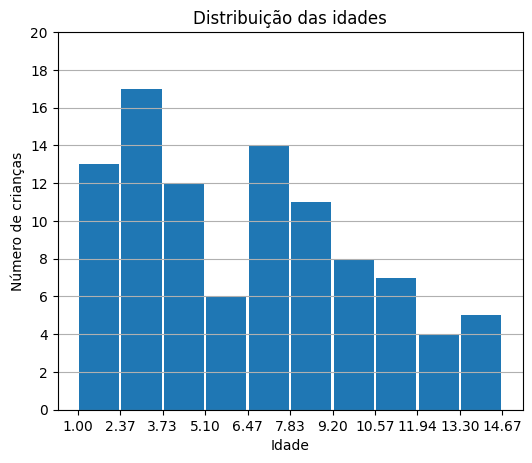

In [ ]:
lista = data['Idade ao exame']
barras = 10
plt.figure(figsize = (6,5), dpi = 100)
data['Idade ao exame'].plot.hist(bins=barras,rwidth=0.95)
ticks = calcula_ticks(lista,barras)
plt.xticks(ticks)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Distribuição das idades')
plt.xlabel('Idade')
plt.ylabel('Número de crianças')
plt.grid(axis='y')

## Mean of constipation duration


In [ ]:
index_seminfo = data[['Duração da constipação até chegar ao serviço']].loc[(data['Duração da constipação até chegar ao serviço']=='Informação imprecisa')].index

In [ ]:
SemInfo = pd.Series(data['Duração da constipação até chegar ao serviço'].dropna()) #taking out the str type data, so we only have float
SemInfo = SemInfo.drop(index_seminfo)
SemInfo = SemInfo.astype(float)

In [ ]:
media_durconst = SemInfo.mean()
media_durconst

4.678148148148147

In [ ]:
std_durconst = SemInfo.std()
std_durconst

3.373937281245426

In [ ]:
moda_durconst = SemInfo.mode()
moda_durconst

0    2.25
dtype: float64

In [ ]:
mediana_durconst = SemInfo.median()

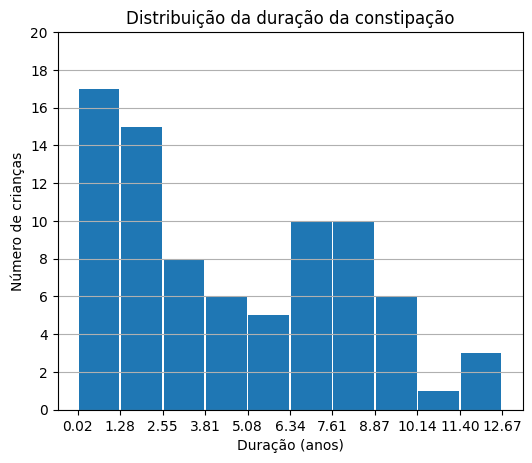

In [ ]:
lista = SemInfo
barras = 10
plt.figure(figsize = (6,5), dpi = 100)
SemInfo.plot.hist(bins=barras,rwidth=0.96)
ticks = calcula_ticks(lista,barras)
plt.xticks(ticks)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20])
plt.title('Distribuição da duração da constipação')
plt.xlabel('Duração (anos)')
plt.ylabel('Número de crianças')
plt.grid(axis='y')

## Percent of children that have done prior clinical treatment

In [ ]:
allvals = data['Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)'].value_counts()
allvals

1.0    85
2.0     7
3.0     6
Name: Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3), dtype: int64

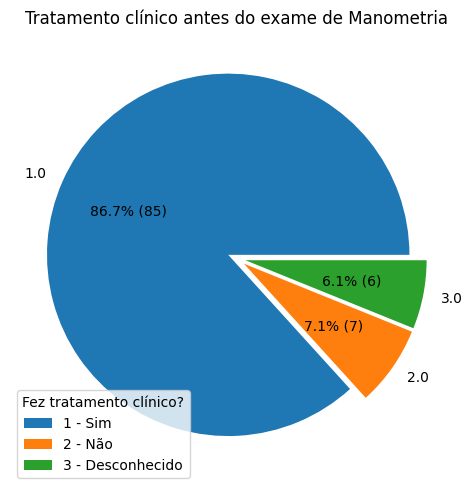

In [ ]:
allvals = data['Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)'].value_counts()
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}% ({:d})".format(pct, absolute)
plt.figure(figsize = (8,6), dpi = 100)
label = ['1 - Sim', '2 - Não', '3 - Desconhecido']
data['Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3)'].value_counts().plot.pie(explode = [0.05,0.05,0.05], autopct=lambda pct:func(pct, allvals))
plt.legend(label,
          title = 'Fez tratamento clínico?',
          loc = 'lower left')
plt.ylabel('')
plt.title('Tratamento clínico antes do exame de Manometria')
plt.show()

## Percent of healthy/ with comorbidity children

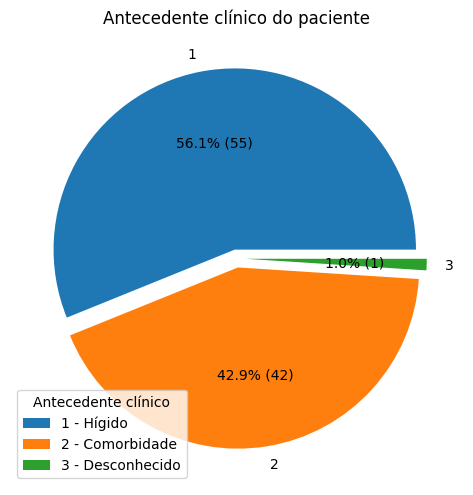

In [ ]:
allvals = data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'].value_counts()
plt.figure(figsize = (8,6), dpi = 100)
label = ['1 - Hígido', '2 - Comorbidade', '3 - Desconhecido']
data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'].value_counts().plot.pie(explode = [0.05,0.05,0.05], autopct=lambda pct:func(pct, allvals))
plt.legend(label,
          title = 'Antecedente clínico',
          loc = 'lower left')
plt.ylabel('')
plt.title('Antecedente clínico do paciente')
plt.show()

## Percent of altered manometry


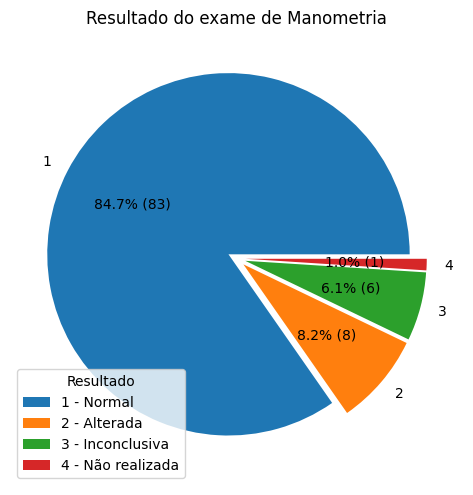

In [ ]:
allvals = data['Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)'].value_counts()
plt.figure(figsize = (8,6), dpi = 100)
label = ['1 - Normal', '2 - Alterada', '3 - Inconclusiva', '4 - Não realizada']
data['Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)'].astype(int).value_counts().plot.pie(explode = [0.05,0.05,0.05, 0.05], autopct=lambda pct:func(pct, allvals))
plt.legend(label,
          title = 'Resultado',
          loc = 'lower left')
plt.ylabel('')
plt.title('Resultado do exame de Manometria')
plt.show()

## Percent of biopsys done


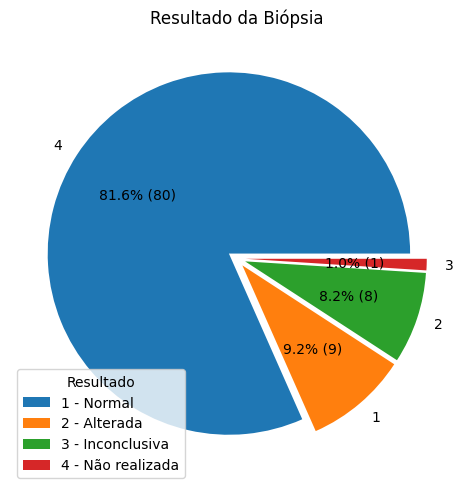

In [ ]:
allvals = data['Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)'].value_counts()
plt.figure(figsize = (8,6), dpi = 100)
label = ['1 - Normal', '2 - Alterada', '3 - Inconclusiva', '4 - Não realizada']
data['Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)'].astype(int).value_counts().plot.pie(explode = [0.05,0.05,0.05, 0.05], autopct=lambda pct:func(pct,allvals))
plt.legend(label,
          title = 'Resultado',
          loc = 'lower left')
plt.ylabel('')
plt.title('Resultado da Biópsia')
plt.show()

## Correlation between manometry and biopsy results


In [ ]:
manometria = pd.get_dummies(data['Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)'] )
manometria.columns = ['Manometria Normal', 
                       'Manometria Alterada',
                       'Manometria Inconclusiva',
                       'Manometria não realizada'
                       ]
manometria.drop('Manometria não realizada',axis =1, inplace=True)

In [ ]:
biopsia = pd.get_dummies(data['Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)'])
biopsia.columns = ['Biópsia Normal', 
                   'Biópsia Alterada',
                   'Biópsia Inconclusiva',
                   'Biópsia não realizada'
                   ]
biopsia.drop('Biópsia não realizada',axis =1, inplace=True)

In [ ]:
corr_manometria_biopsia = pd.concat([manometria,biopsia], axis=1)
corr_manometria_biopsia

,Manometria Normal,Manometria Alterada,Manometria Inconclusiva,Biópsia Normal,Biópsia Alterada,Biópsia Inconclusiva
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
94,1,0,0,0,0,0
95,1,0,0,0,0,0
96,1,0,0,0,0,0
97,1,0,0,0,0,0


In [ ]:
corr_manometria_biopsia[['Manometria Alterada', 'Biópsia Alterada']].corr()

,Manometria Alterada,Biópsia Alterada
Manometria Alterada,1.000000,0.455556
Biópsia Alterada,0.455556,1.000000


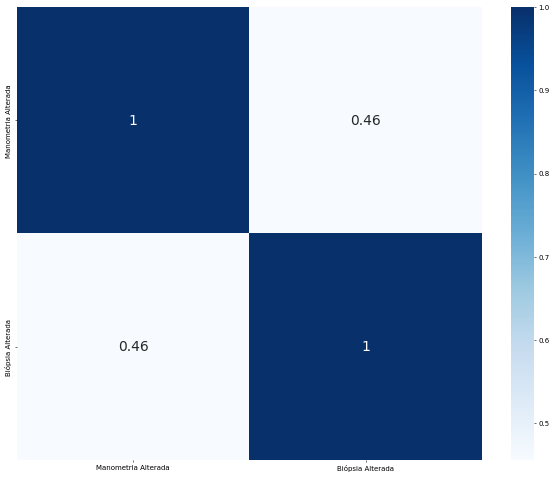

In [ ]:
plt.figure(figsize = (15,12), dpi = 50)
sns.heatmap(corr_manometria_biopsia[['Manometria Alterada', 'Biópsia Alterada']].corr(), cmap = 'Blues', annot = True, annot_kws = {'size':20})

In [ ]:
corr_manometria_biopsia[['Manometria Alterada', 'Biópsia Normal']].corr()

,Manometria Alterada,Biópsia Normal
Manometria Alterada,1.000000,0.163282
Biópsia Normal,0.163282,1.000000


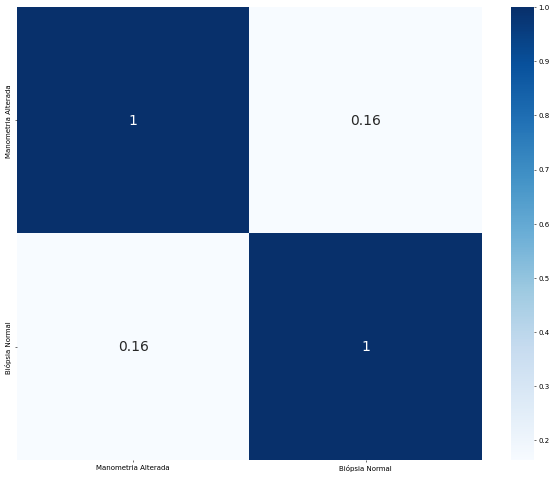

In [ ]:
plt.figure(figsize = (15,12), dpi = 50)
sns.heatmap(corr_manometria_biopsia[['Manometria Alterada', 'Biópsia Normal']].corr(), cmap = 'Blues', annot = True,annot_kws = {'size':20})

## Correlation between comorbity and altered exams


In [ ]:
data

,Idade ao exame,Duração da constipação até chegar ao serviço,Fez tratamento clínico antes da Manometria? (Sim=1/não=2/desconhecido=3),ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3),Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4),Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4),Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)
0,5.00,0.02,1.0,2,1.0,4.0,1.0
1,8.58,8.58,1.0,2,1.0,4.0,2.0
2,12.08,12.08,1.0,2,2.0,4.0,3.0
3,11.25,2.25,1.0,1,1.0,4.0,2.0
4,3.17,1.17,1.0,2,1.0,4.0,1.0
...,...,...,...,...,...,...,...
94,10.17,1.17,1.0,1,1.0,4.0,3.0
95,12.00,9,1.0,1,1.0,4.0,3.0
96,10.58,10.25,1.0,2,1.0,4.0,3.0
97,7.08,6.75,1.0,1,1.0,4.0,3.0


In [ ]:
exame_alterado = []
for idx, _ in data[['Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)','Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)']].iterrows():
  if data['Manometria (normal=1/alterada=2/inconclusiva=3/não realizada=4)'][idx]==2 or data['Resultado da Biópsia (normal=1/alterada=2/inconclusivo=3/não realizada=4)'][idx]==2:
    exame_alterado.append(1)
  else:
    exame_alterado.append(0) 

In [ ]:
comorbidade = []
for idx, _ in data[['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)']].iterrows():
  if data['ANTECEDENTE CLÍNICO DO PACIENTE (hígido=1/comorbidade=2/desconhecido=3)'][idx]==2 :
    comorbidade.append(1)
  else:
    comorbidade.append(0) 

In [ ]:
exame_alterado = pd.Series(exame_alterado)

In [ ]:
comorbidade = pd.Series(comorbidade)

In [ ]:
corr_comorbidade_exame = pd.concat([exame_alterado,comorbidade], axis=1)
corr_comorbidade_exame.columns = ['Exame alterado', 'Comorbidade']
corr_comorbidade_exame

,Exame alterado,Comorbidade
0,0,1
1,0,1
2,1,1
3,0,0
4,0,1
...,...,...
93,0,0
94,0,0
95,0,1
96,0,0


In [ ]:
corr_comorbidade_exame[['Exame alterado', 'Comorbidade']].corr()

,Exame alterado,Comorbidade
Exame alterado,1.000000,0.368429
Comorbidade,0.368429,1.000000


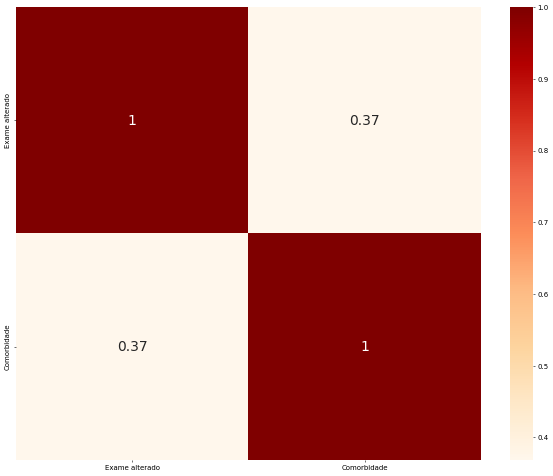

In [ ]:
plt.figure(figsize = (15,12), dpi = 50)
sns.heatmap(corr_comorbidade_exame[['Exame alterado', 'Comorbidade']].corr(), cmap = 'OrRd', annot = True,annot_kws = {'size':20})

## Percent of the outcome for the pacients

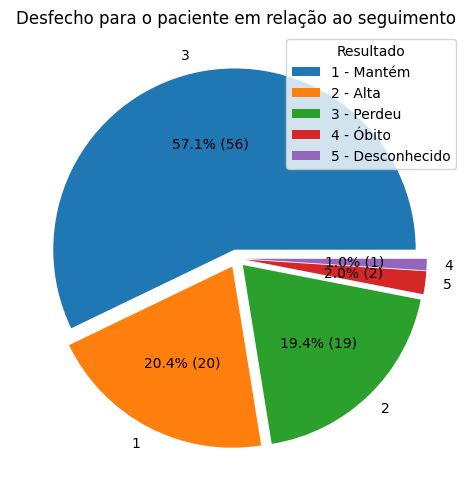

In [ ]:
allvals = data['Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)'].value_counts()
plt.figure(figsize = (8,6), dpi = 100)
label = ['1 - Mantém', '2 - Alta', '3 - Perdeu', '4 - Óbito','5 - Desconhecido']
data['Desfecho para o paciente em relação ao seguimento (mantém=1/alta=2/perdeu=3/óbito=4/desconhecido=5)'].astype(int).value_counts().plot.pie(explode = [0.05,0.05,0.05,0.05, 0.05], autopct= lambda pct:func(pct, allvals))
plt.legend(label,
          title = 'Resultado',
          loc = 'upper right')
plt.ylabel('')
plt.title('Desfecho para o paciente em relação ao seguimento')
plt.show()